The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [65]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

In [66]:
# Import the dataset
df = pd.read_csv("data/nobel.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [67]:
# Find out the most commonly awarded gender and birth country
top_gender = df["sex"].value_counts().index[0]
top_country = df["birth_country"].value_counts().index[0]

print("\n The gender with the most Nobel laureates is:", top_gender)
print(" The most common birth country of Nobel laureates is:", top_country)


 The gender with the most Nobel laureates is: Male
 The most common birth country of Nobel laureates is: United States of America


In [68]:
# Calculate the proportion of USA born winners per decade
df["usa_born"] = df["birth_country"] == "United States of America"
df["decade"] = (np.floor(df["year"] / 10) * 10).astype(int)
prop_usa_winners = df.groupby("decade", as_index=False)["usa_born"].mean()

prop_usa_winners

,decade,usa_born
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


### `df["decade"] = (np.floor(df["year"] / 10) * 10).astype(int)`

1. `nobel['year'] / 10`:

* This operation divides each value in the year column by 10, converting years to floating-point numbers representing the decade they fall in. For example, the year 1986 would be converted to 198.6.

2. `np.floor(nobel['year'] / 10)`:

* The np.floor() function from the NumPy library takes the floor of each value, which means it rounds down to the nearest integer. Continuing with the example, 198.6 becomes 198.0.

3. `np.floor(nobel['year'] / 10) * 10`:

* This operation multiplies the floored value by 10 to get back to a whole decade. For example, 198.0 becomes 1980.0.

4. `.astype(int)`:

* This converts the floating-point numbers back to integers, resulting in whole decade values like 1980.

### `prop_usa_winners = df.groupby("decade", as_index=False)["usa_born"].mean()`

1. `nobel.groupby('decade', as_index=False)`:

* This groups the nobel DataFrame by the decade column.
as_index=False ensures that the decade column remains a regular column in the resulting DataFrame, rather than becoming the index.

2. `['usa_born_winner']`:

* This selects the usa_born_winner column from the grouped data. This column presumably contains boolean values indicating whether the winner was born in the USA (True/False).

3. `.mean()`:

* This calculates the mean of the usa_born_winner column for each group (decade).
Since usa_born_winner contains boolean values, the mean of these values for each decade represents the proportion of USA-born winners in that decade. (True is treated as 1 and False as 0 in numerical operations.)

In [69]:
# Identify the decade with the highest proportion of US-born winners
max_decade_usa = prop_usa_winners[prop_usa_winners["usa_born"] == prop_usa_winners["usa_born"].max()]["decade"].values[0]

print("The decade had the highest ratio of US-born Nobel Prize winners to total winners:", max_decade_usa)

The decade had the highest ratio of US-born Nobel Prize winners to total winners: 2000


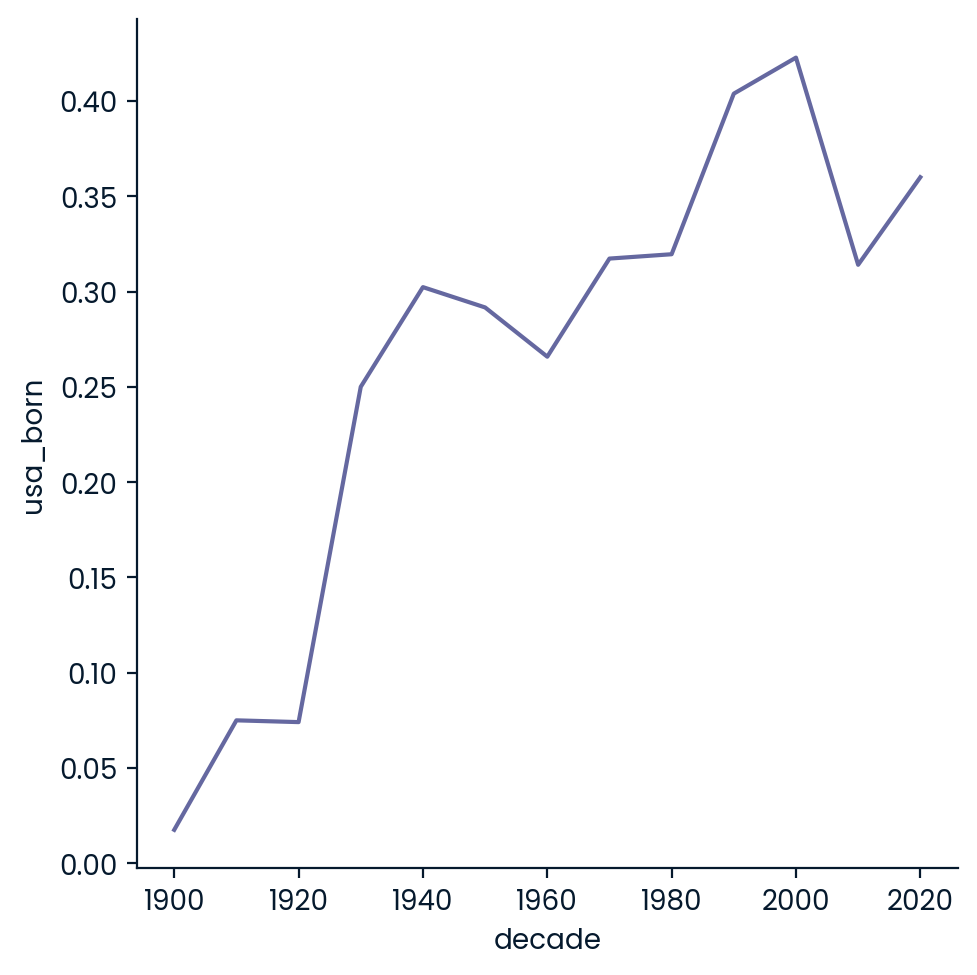

In [70]:
# Optional: Plotting USA born winners
ax1 = sns.relplot(x='decade', y='usa_born', data=prop_usa_winners, kind="line")

In [71]:
df

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN,True,2020
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN,NaN,False,2020
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN,NaN,NaN,NaN,False,2020
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN,False,2020


In [72]:
# Calculating the proportion of female laureates per decade
df["female"] = df["sex"] == "Female"
prop_female = df.groupby(["decade", "category"], as_index=False)["female"].mean()

prop_female

,decade,category,female
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
67,2020,Economics,0.111111
68,2020,Literature,0.500000
69,2020,Medicine,0.125000
70,2020,Peace,0.285714


In [73]:
# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female[prop_female["female"] == prop_female["female"].max()]

max_female_decade_category

,decade,category,female
68,2020,Literature,0.5


In [74]:
# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category["decade"].values[0] : max_female_decade_category["category"].values[0]}

print("The following decade and Nobel Prize category combination had the highest proportion of female laureates:", max_female_dict)

The following decade and Nobel Prize category combination had the highest proportion of female laureates: {2020: 'Literature'}


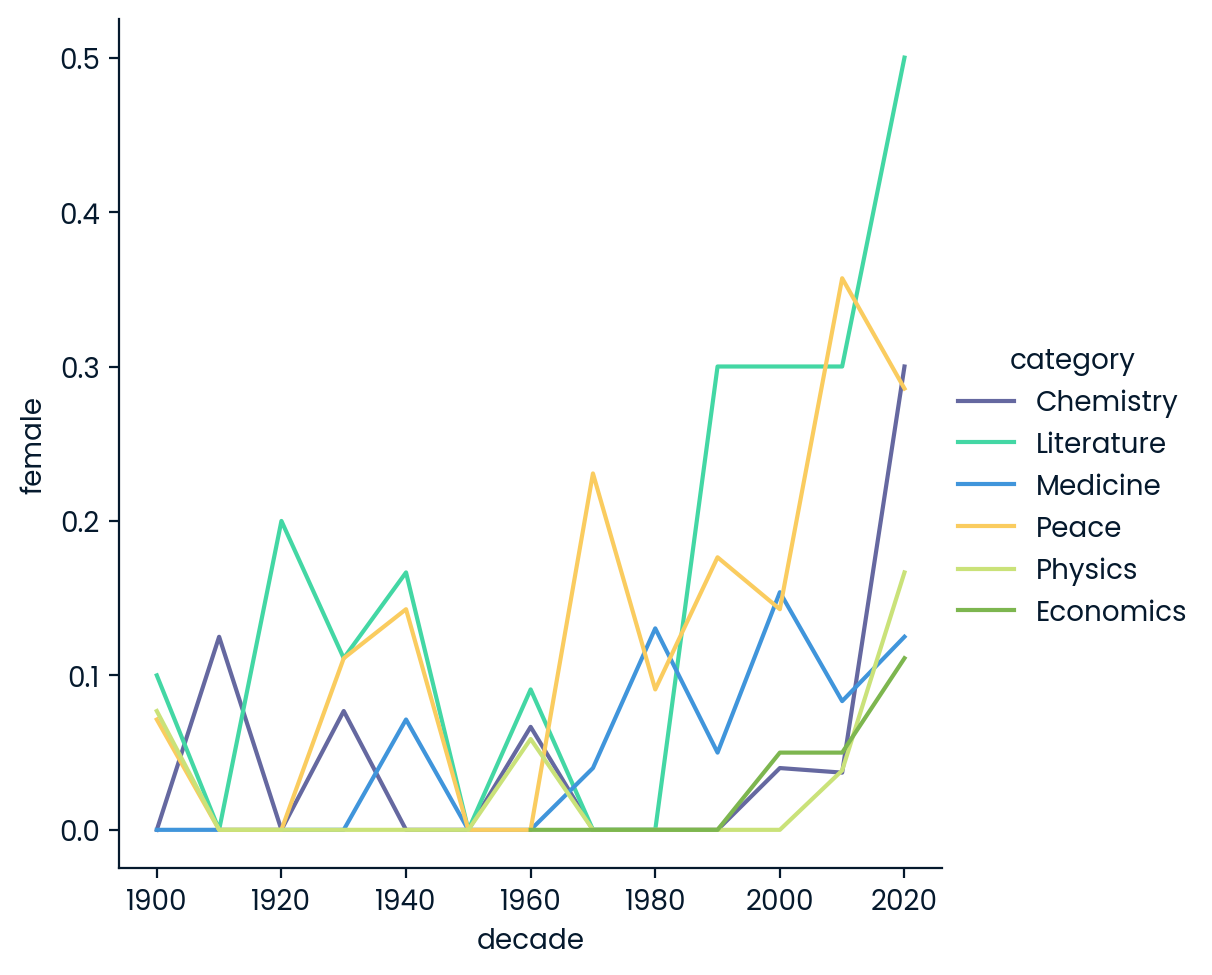

In [75]:
# Optional: Plotting female winners with % winners on the y-axis
ax2 = sns.relplot(x="decade", y="female", hue="category", data=prop_female, kind="line")

In [76]:
df

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born,decade,female
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN,True,2020,False
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN,NaN,False,2020,False
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN,NaN,NaN,NaN,False,2020,False
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN,False,2020,True


In [79]:
# Finding the first woman to win a Nobel Prize
female_df = df[df["female"]]
first_woman_row = female_df[female_df["year"] == female_df["year"].min()]

first_woman_row

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born,decade,female
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


In [89]:
first_woman_name = first_woman_row['full_name'].values[0]
first_woman_category = first_woman_row['category'].values[0]
print(f"\nThe first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")


The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


In [82]:
# Count the laureates by full_name
counts = df["full_name"].value_counts()
counts

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
                                                                                    ..
Karl Ziegler                                                                         1
Giulio Natta                                                                         1
Giorgos Seferis                                                                      1
Sir John Carew Eccles                                                                1
Claudia Goldin                                                                       1
Name: full_name, Length: 993, dtype: int64

In [88]:
repeat = counts[counts >= 2].index
repeat_list = list(repeat)

print("\nThe repeat winners are :", repeat_list)


The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
